In [3]:
from itertools import combinations, product
from collections import deque, defaultdict
import math
import matplotlib.pyplot as plt

def all_undirected_graphs(n):
    vertices = list(range(n))
    possible_edges = list(combinations(vertices, 2))
    m = len(possible_edges)
    for mask in range(1 << m):
        g = {v: set() for v in vertices}
        for i, (u, v) in enumerate(possible_edges):
            if (mask >> i) & 1:
                g[u].add(v)
                g[v].add(u)
        yield g

def edges_of(g):
    edges = []
    for u in g:
        for v in g[u]:
            if u < v:
                edges.append((u, v))
    return edges

def num_vertices(g):
    return len(g)

def num_edges(g):
    return len(edges_of(g))

def bfs_components(g):
    visited = set()
    comps = []
    for start in g:
        if start in visited:
            continue
        queue = deque([start])
        comp = set([start])
        visited.add(start)
        while queue:
            u = queue.popleft()
            for v in g[u]:
                if v not in visited:
                    visited.add(v)
                    comp.add(v)
                    queue.append(v)
        comps.append(comp)
    return comps

def is_connected(g):
    if not g:
        return True
    comps = bfs_components(g)
    return len(comps) == 1

def has_cycle_undirected(g):
    visited = set()
    def dfs(u, parent):
        visited.add(u)
        for v in g[u]:
            if v == parent:
                continue
            if v in visited:
                return True
            if dfs(v, u):
                return True
        return False
    for start in g:
        if start not in visited:
            if dfs(start, -1):
                return True
    return False

def unique_simple_path_between_all_pairs(g):
    
    V = list(g.keys())
    for i in range(len(V)):
        for j in range(i + 1, len(V)):
            s, t = V[i], V[j]
            paths_count = count_simple_paths(g, s, t, max_len=len(V))
            if paths_count != 1:
                return False
    return True

def count_simple_paths(g, s, t, max_len):
    count = 0
    def dfs(u, target, visited):
        nonlocal count
        if len(visited) > max_len + 1:
            return
        if u == target:
            count += 1
            return
        for v in g[u]:
            if v not in visited:
                visited.add(v)
                dfs(v, target, visited)
                visited.remove(v)
    dfs(s, t, {s})
    return count

def is_minimally_connected(g):
    if not is_connected(g):
        return False
    for (u, v) in edges_of(g):
        # remove edge
        g[u].remove(v)
        g[v].remove(u)
        conn = is_connected(g)
        # restore edge
        g[u].add(v)
        g[v].add(u)
        if conn:  
            return False
    return True

def is_maximally_acyclic(g):
    if has_cycle_undirected(g):
        return False
    V = list(g.keys())
    existing_edges = set()
    for u in g:
        for v in g[u]:
            if u < v:
                existing_edges.add((u, v))
    for u, v in combinations(V, 2):
        if (u, v) not in existing_edges:
            # try adding this edge
            g[u].add(v)
            g[v].add(u)
            cyc = has_cycle_undirected(g)
            # remove the edge back
            g[u].remove(v)
            g[v].remove(u)
            if not cyc:
                return False
    return True
    
# Problem 1: Definitions of a Tree – as boolean predicates
def is_tree_def1(g):
    return is_connected(g) and not has_cycle_undirected(g)
def is_tree_def2(g):
    return is_connected(g) and not has_cycle_undirected(g)

def is_tree_def3(g):
    V = num_vertices(g)
    E = num_edges(g)
    return is_connected(g) and (E <= V - 1)

def is_tree_def4(g):
    return is_minimally_connected(g)

def is_tree_def5(g):
    V = num_vertices(g)
    E = num_edges(g)
    return (not has_cycle_undirected(g)) and (E >= V - 1)

def is_tree_def6(g):
    return is_maximally_acyclic(g)

def is_tree_def7(g):
    return unique_simple_path_between_all_pairs(g)

def check_equivalence_for_n(n):
    
    # Brute-force check: for all graphs on n vertices,
    #verify that definitions (1)-(7) give identical answers.
    
    count_graphs = 0
    count_trees = 0
    for g in all_undirected_graphs(n):
        count_graphs += 1

        d1 = is_tree_def1(g)
        d2 = is_tree_def2(g)
        d3 = is_tree_def3(g)
        d4 = is_tree_def4(g)
        d5 = is_tree_def5(g)
        d6 = is_tree_def6(g)
        d7 = is_tree_def7(g)

        
        vals = [d1, d2, d3, d4, d5, d6, d7]
        if not all(v == vals[0] for v in vals[1:]):
            print(f"Found counterexample on n={n}")
            print("Edges:", edges_of(g))
            print("defs:", vals)
            return False

        if d1:
            count_trees += 1

    print(f"n={n}, graphs checked={count_graphs}, trees found={count_trees}")
    return True


# Run equivalence check for small n
for n in range(1, 6):
    ok = check_equivalence_for_n(n)
    if not ok:
        break


n=1, graphs checked=1, trees found=1
n=2, graphs checked=2, trees found=1
n=3, graphs checked=8, trees found=3
n=4, graphs checked=64, trees found=16
n=5, graphs checked=1024, trees found=125


Adjacency matrix for Graph 1 (undirected):
    A  B  C  D  E
A | 0 1 1 0 0
B | 1 0 1 1 0
C | 1 1 0 1 0
D | 0 1 1 0 1
E | 0 0 0 1 0

Edges of Graph 1:
A — B
A — C
B — C
B — D
C — D
D — E


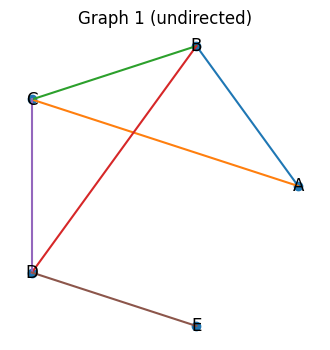


Adjacency matrix for Graph 2 (directed):
    A  B  C  D  E
A | 0 1 1 0 0
B | 0 0 1 0 1
C | 0 0 0 1 0
D | 0 1 0 0 1
E | 0 0 0 0 0

Directed edges of Graph 2:
A → B
A → C
B → C
B → E
C → D
D → B
D → E


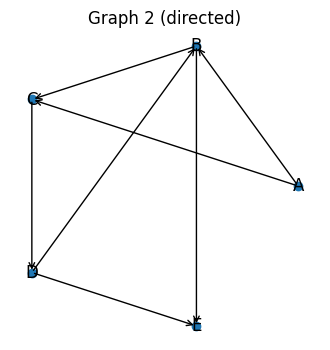


Simple directed cycles in Graph 2:
   B → C → D → B


In [4]:
# Problem 2: CSC representation and reconstruction

def csc_to_dense(col_pointers, row_indices, values, n_rows, n_cols, undirected=False):
    """
    Convert CSC representation to dense adjacency matrix (list of lists).
    For undirected=True, we symmetrize.
    """
    A = [[0 for _ in range(n_cols)] for _ in range(n_rows)]
    for j in range(n_cols):
        start = col_pointers[j]
        end = col_pointers[j + 1]
        for idx in range(start, end):
            i = row_indices[idx]
            val = values[idx]
            A[i][j] = val
            if undirected:
                A[j][i] = val
    return A


def print_adj_matrix(A, labels):
    print("    " + "  ".join(labels))
    for i, row in enumerate(A):
        print(f"{labels[i]} | " + " ".join(str(int(x)) for x in row))

# Graph 1: Undirected

labels = ["A", "B", "C", "D", "E"]
n = len(labels)

col_pointers_1 = [0, 2, 5, 8, 11, 12]
row_indices_1  = [1, 2, 0, 2, 3, 0, 1, 3, 1, 2, 4, 3]
values_1       = [1] * len(row_indices_1)

A1 = csc_to_dense(col_pointers_1, row_indices_1, values_1, n_rows=n, n_cols=n, undirected=True)

print("Adjacency matrix for Graph 1 (undirected):")
print_adj_matrix(A1, labels)


def edges_from_adj_undirected(A, labels):
    edges = []
    n = len(labels)
    for i in range(n):
        for j in range(i + 1, n):
            if A[i][j] != 0:
                edges.append((labels[i], labels[j]))
    return edges


edges1 = edges_from_adj_undirected(A1, labels)
print("\nEdges of Graph 1:")
for e in edges1:
    print(f"{e[0]} — {e[1]}")


def draw_undirected_graph(A, labels, positions=None, title=""):
    n = len(labels)
    if positions is None:
        # simple layout on a circle
        positions = {}
        for k, v in enumerate(labels):
            angle = 2 * math.pi * k / n
            positions[v] = (math.cos(angle), math.sin(angle))

    plt.figure(figsize=(4, 4))
    # nodes
    xs = [positions[v][0] for v in labels]
    ys = [positions[v][1] for v in labels]
    plt.scatter(xs, ys)
    for v in labels:
        x, y = positions[v]
        plt.text(x, y, v, fontsize=12, ha='center', va='center')

    # edges
    for i in range(n):
        for j in range(i + 1, n):
            if A[i][j] != 0:
                x1, y1 = positions[labels[i]]
                x2, y2 = positions[labels[j]]
                plt.plot([x1, x2], [y1, y2])

    plt.title(title)
    plt.axis('equal')
    plt.axis('off')
    plt.show()


draw_undirected_graph(A1, labels, title="Graph 1 (undirected)")

# Graph 2: Directed

col_pointers_2 = [0, 0, 2, 4, 5, 7]
row_indices_2  = [0, 3, 0, 1, 2, 1, 3]
values_2       = [1] * len(row_indices_2)

A2 = csc_to_dense(col_pointers_2, row_indices_2, values_2, n_rows=n, n_cols=n, undirected=False)

print("\nAdjacency matrix for Graph 2 (directed):")
print_adj_matrix(A2, labels)


def edges_from_adj_directed(A, labels):
    edges = []
    n = len(labels)
    for i in range(n):
        for j in range(n):
            if A[i][j] != 0:
                edges.append((labels[i], labels[j]))
    return edges


edges2 = edges_from_adj_directed(A2, labels)
print("\nDirected edges of Graph 2:")
for u, v in edges2:
    print(f"{u} → {v}")


def draw_directed_graph(A, labels, positions=None, title=""):
    n = len(labels)
    if positions is None:
        positions = {}
        for k, v in enumerate(labels):
            angle = 2 * math.pi * k / n
            positions[v] = (math.cos(angle), math.sin(angle))

    plt.figure(figsize=(4, 4))
    xs = [positions[v][0] for v in labels]
    ys = [positions[v][1] for v in labels]
    plt.scatter(xs, ys)
    for v in labels:
        x, y = positions[v]
        plt.text(x, y, v, fontsize=12, ha='center', va='center')

    for i in range(n):
        for j in range(n):
            if A[i][j] != 0:
                x1, y1 = positions[labels[i]]
                x2, y2 = positions[labels[j]]
                # draw arrow as line + arrowhead
                plt.annotate("",
                             xy=(x2, y2), xycoords='data',
                             xytext=(x1, y1), textcoords='data',
                             arrowprops=dict(arrowstyle="->", lw=1))

    plt.title(title)
    plt.axis('equal')
    plt.axis('off')
    plt.show()


draw_directed_graph(A2, labels, title="Graph 2 (directed)")


# Unique directed cycle in Graph 2


def adjlist_from_adj_directed(A, labels):
    adj = {v: [] for v in labels}
    n = len(labels)
    for i in range(n):
        for j in range(n):
            if A[i][j] != 0:
                adj[labels[i]].append(labels[j])
    return adj


def find_simple_cycles_directed(adj):
    """
    Very small graph version of Johnson-like search for simple cycles.
    adj: dict {node: list(neighbors)}
    Returns list of cycles as lists of nodes (no rotation normalization here).
    """
    cycles = []
    nodes = list(adj.keys())
    index = {v: i for i, v in enumerate(nodes)}

    def dfs(start, u, visited, stack):
        visited.add(u)
        stack.append(u)
        for v in adj[u]:
            if v == start:
                # cycle found
                cycles.append(stack.copy())
            elif v not in visited and index[v] >= index[start]:
                dfs(start, v, visited, stack)
        stack.pop()
        visited.remove(u)

    for i, start in enumerate(nodes):
        visited = set()
        dfs(start, start, visited, [])
    return cycles


adj2 = adjlist_from_adj_directed(A2, labels)
cycles2 = find_simple_cycles_directed(adj2)

print("\nSimple directed cycles in Graph 2:")
for cyc in cycles2:
    cyc_str = " → ".join(cyc + [cyc[0]])
    print("  ", cyc_str)